In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# step 1 : load the data


In [3]:
data=pd.read_csv('iris.csv')

In [4]:
# print the data
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.columns # there are 5 columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
# Basic information

In [8]:
data.info() # with the help of info function we print the datatype,count of that attribute
# 1. there are 150 entries
# 2. there are 5 columns
# 3. 4 columns having datatype float and one has the datatype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
print(data['species'].unique()) # there are 3 type of species

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# step 2 : Domain analysis

## Aim of our dataset is to develop a model that classify iris flower into different species based on their sepal and petal measurement

# Description about columns :
## 1. sepal length :
### Represents the length of the sepal in centimeters.
### Continuous numerical variable.

## 2. sepal width:
### Represents the width of the sepal in centimeters.
### Continuous numerical variable.

## 3.Petal Length :
### Represents the length of the petal in centimeters.
### Continuous numerical variable.

## 4.Petal Width :
### Represents the width of the petal in centimeters.
## Continuous numerical variable.

## 5.Species(output parameter):

### Represents the species of the Iris flower.
### Categorical variable with three possible classes:
### 1.Iris-setosa
### 2.Iris-versicolor
### 3.Iris-virginica

# Step 3 : Exploratory data analysis(EDA):

# Bivariate analysis

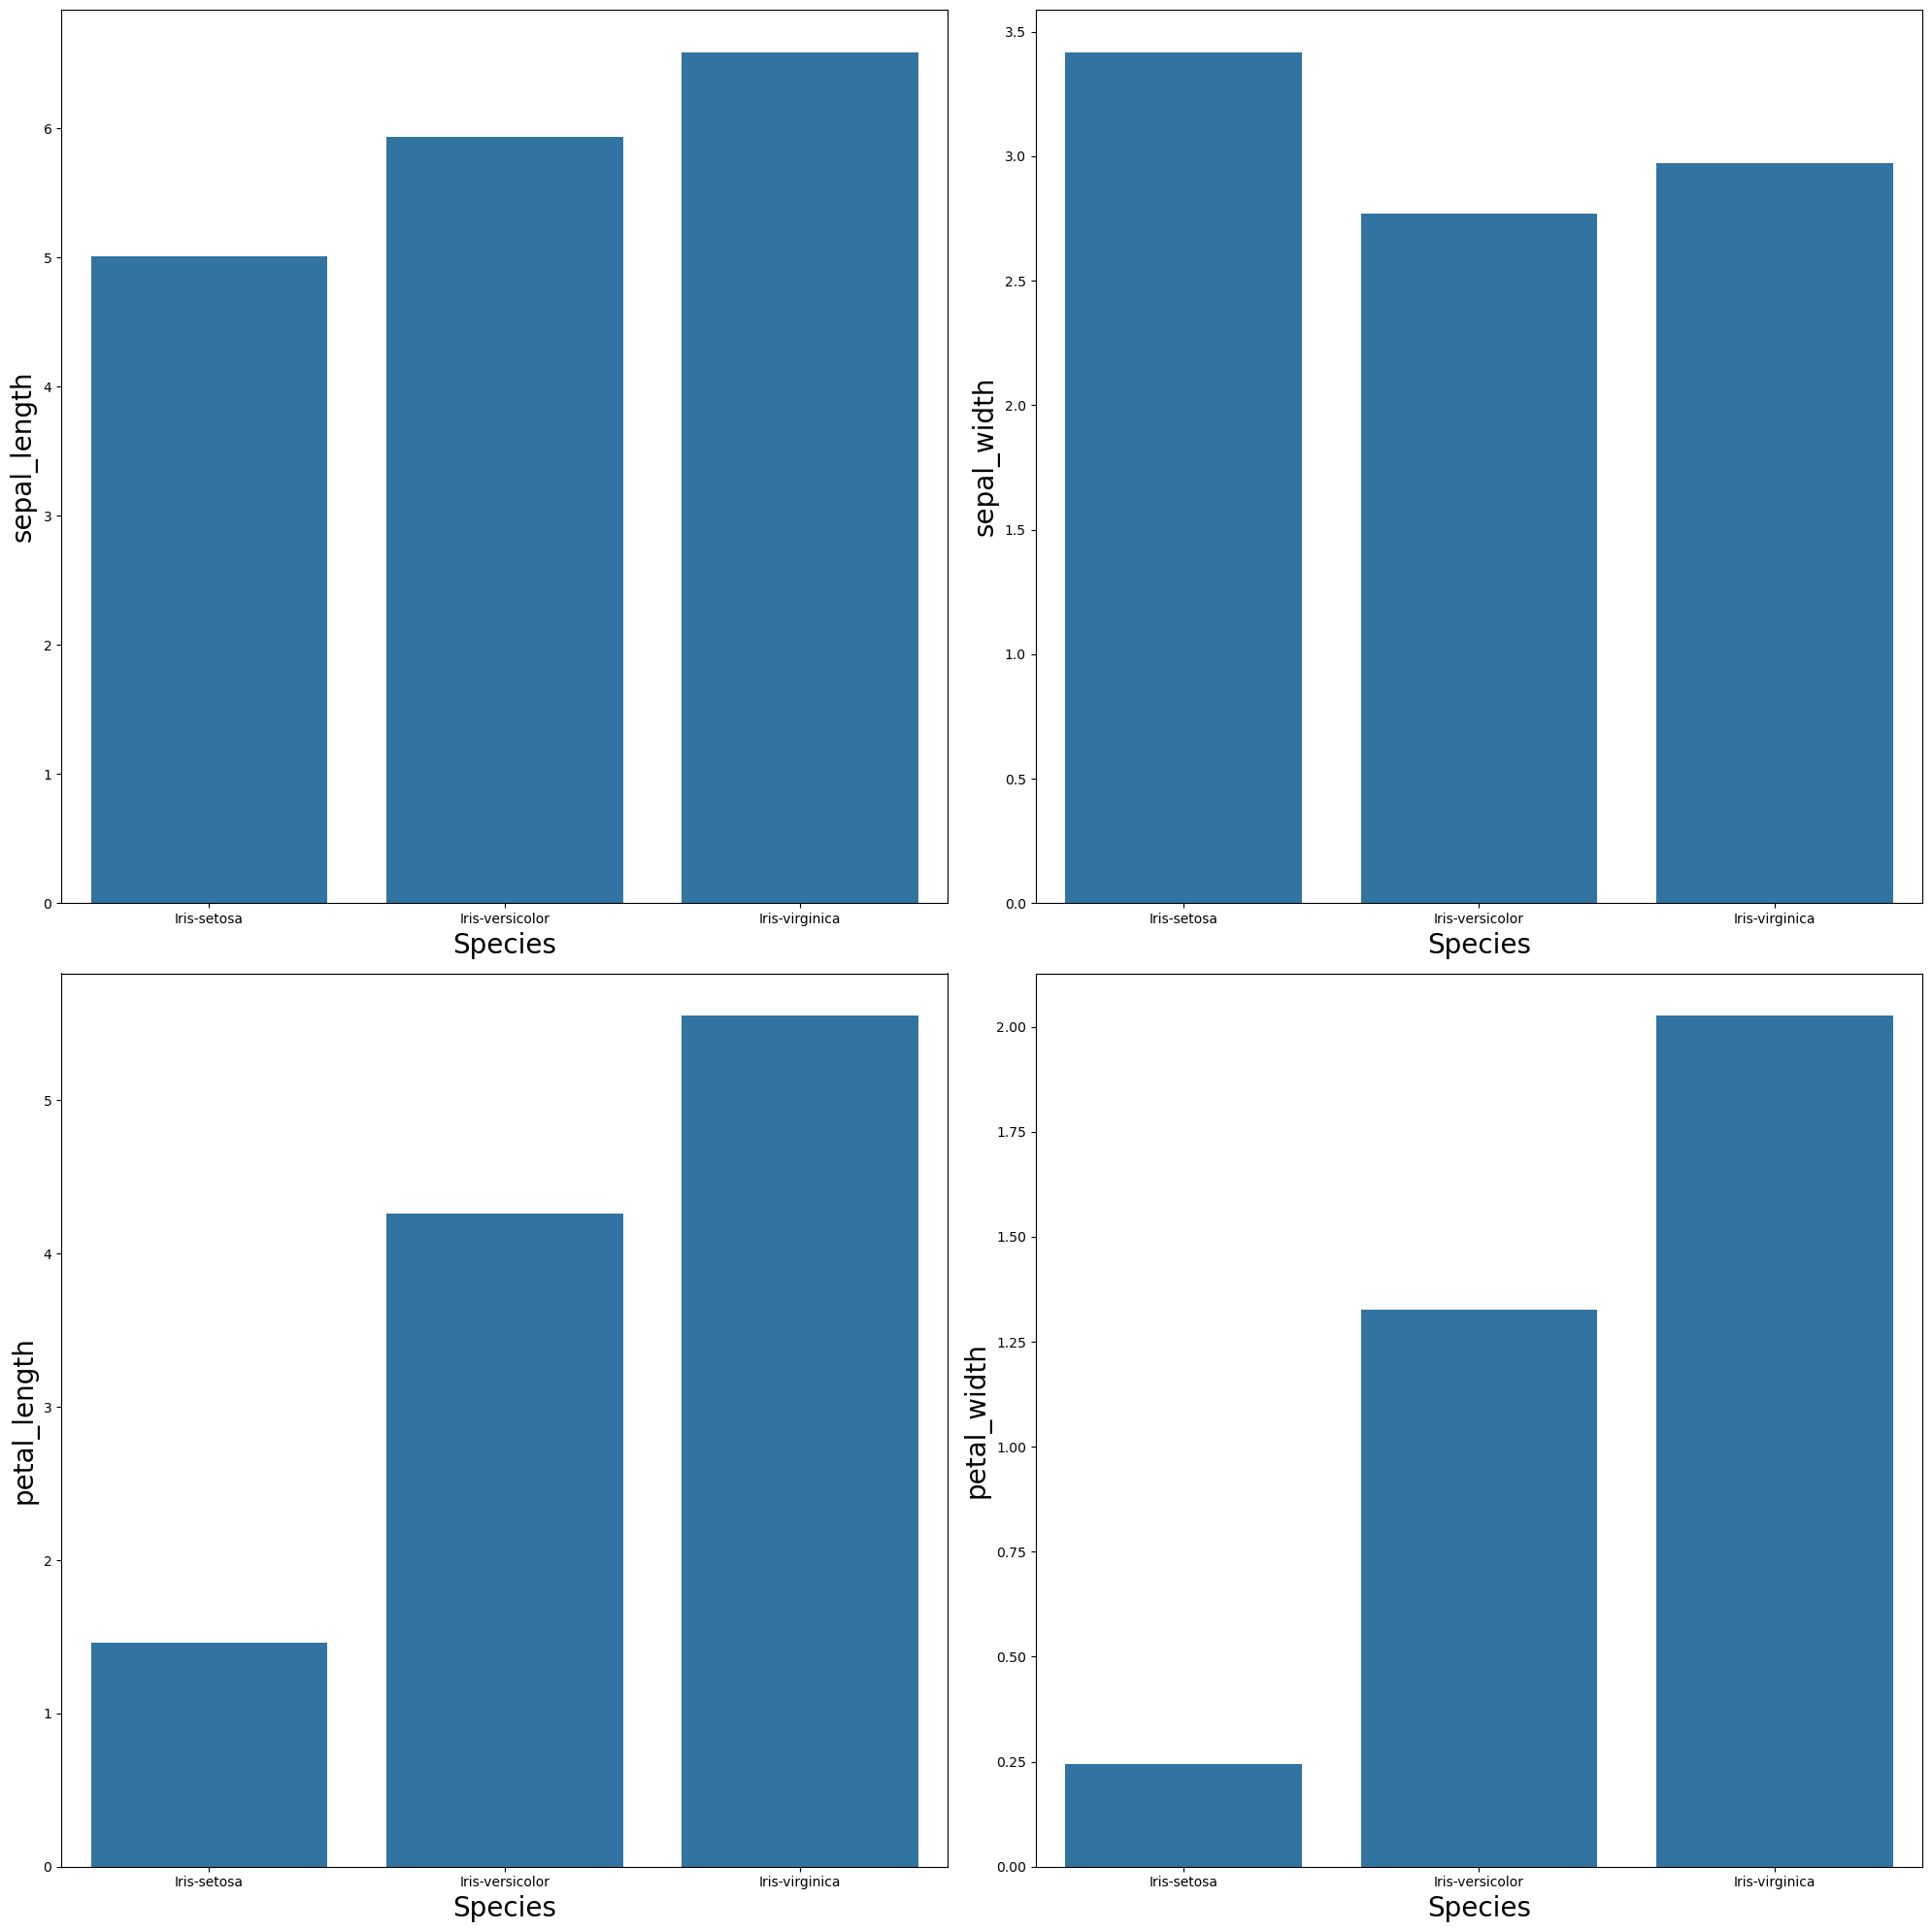

In [14]:


# List of numerical columns
box = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Set up the plot
plt.figure(figsize=(20, 20), facecolor='white')
plotnum = 1

# Iterate through the columns
for c in box:
    if plotnum <= len(box): 
        ax = plt.subplot(2, 2, plotnum)  
        sns.barplot(x='species', y=c, data=data, ci=None)  
        plt.xlabel('Species', fontsize=20)
        plt.ylabel(c, fontsize=20)
    
        plotnum += 1

# Adjust layout
plt.tight_layout()
plt.show()


# Univariate analysis 

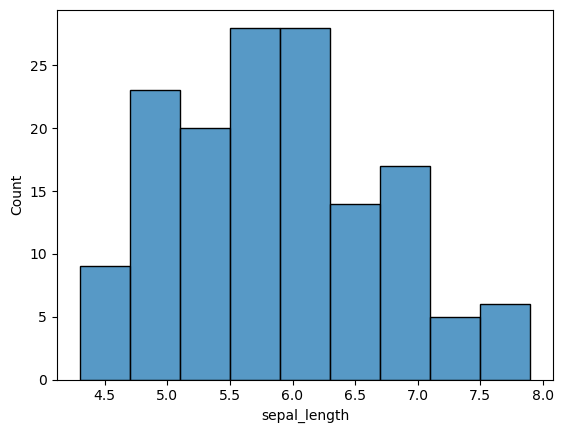

In [16]:
sns.histplot(x='sepal_length',data=data)
plt.show()

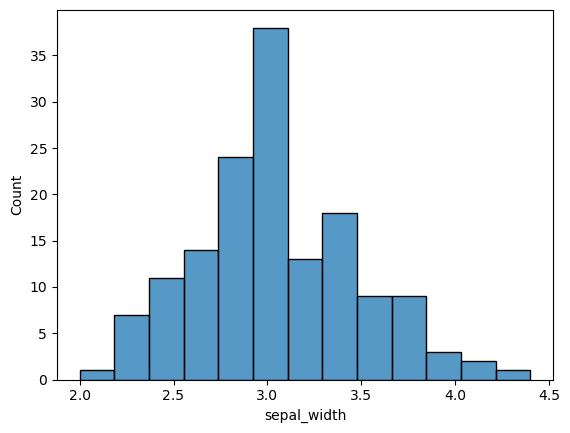

In [17]:
sns.histplot(x='sepal_width',data=data)
plt.show()

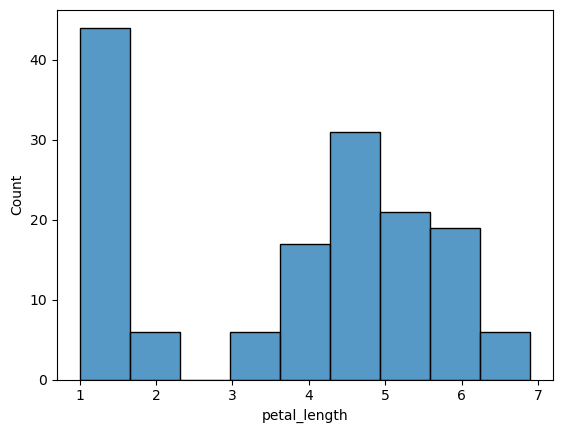

In [18]:
sns.histplot(x='petal_length',data=data)
plt.show()

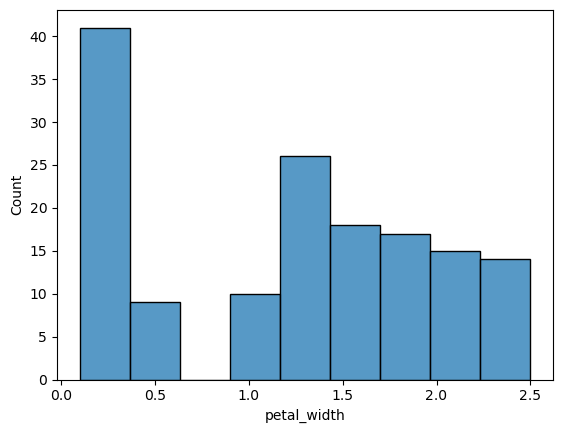

In [19]:
sns.histplot(x='petal_width',data=data)
plt.show()

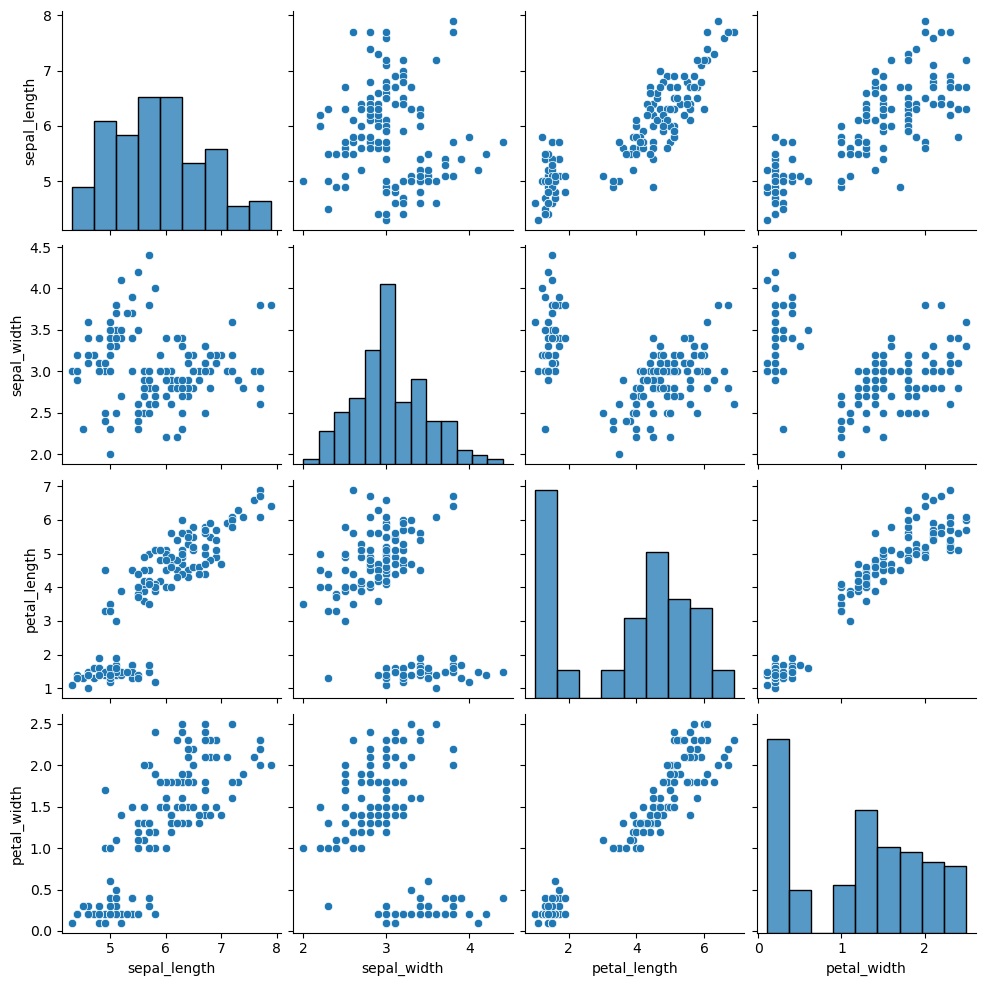

In [20]:
# check the relationship between attributes
sns.pairplot(data)

# step 4 : Feature Engineering 


In [10]:
## 1. checking for null values
data.isnull().sum() # no null value

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# as there is no categarical column present no need of encoding

In [12]:
data.shape

(150, 5)

In [13]:
## 2. checking for duplicated 
data.duplicated().sum() # there are three duplicate data 

3

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
# encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [16]:
data['species'] = label_encoder.fit_transform(data['species'])

In [17]:
## 3. outlier checking and handling 

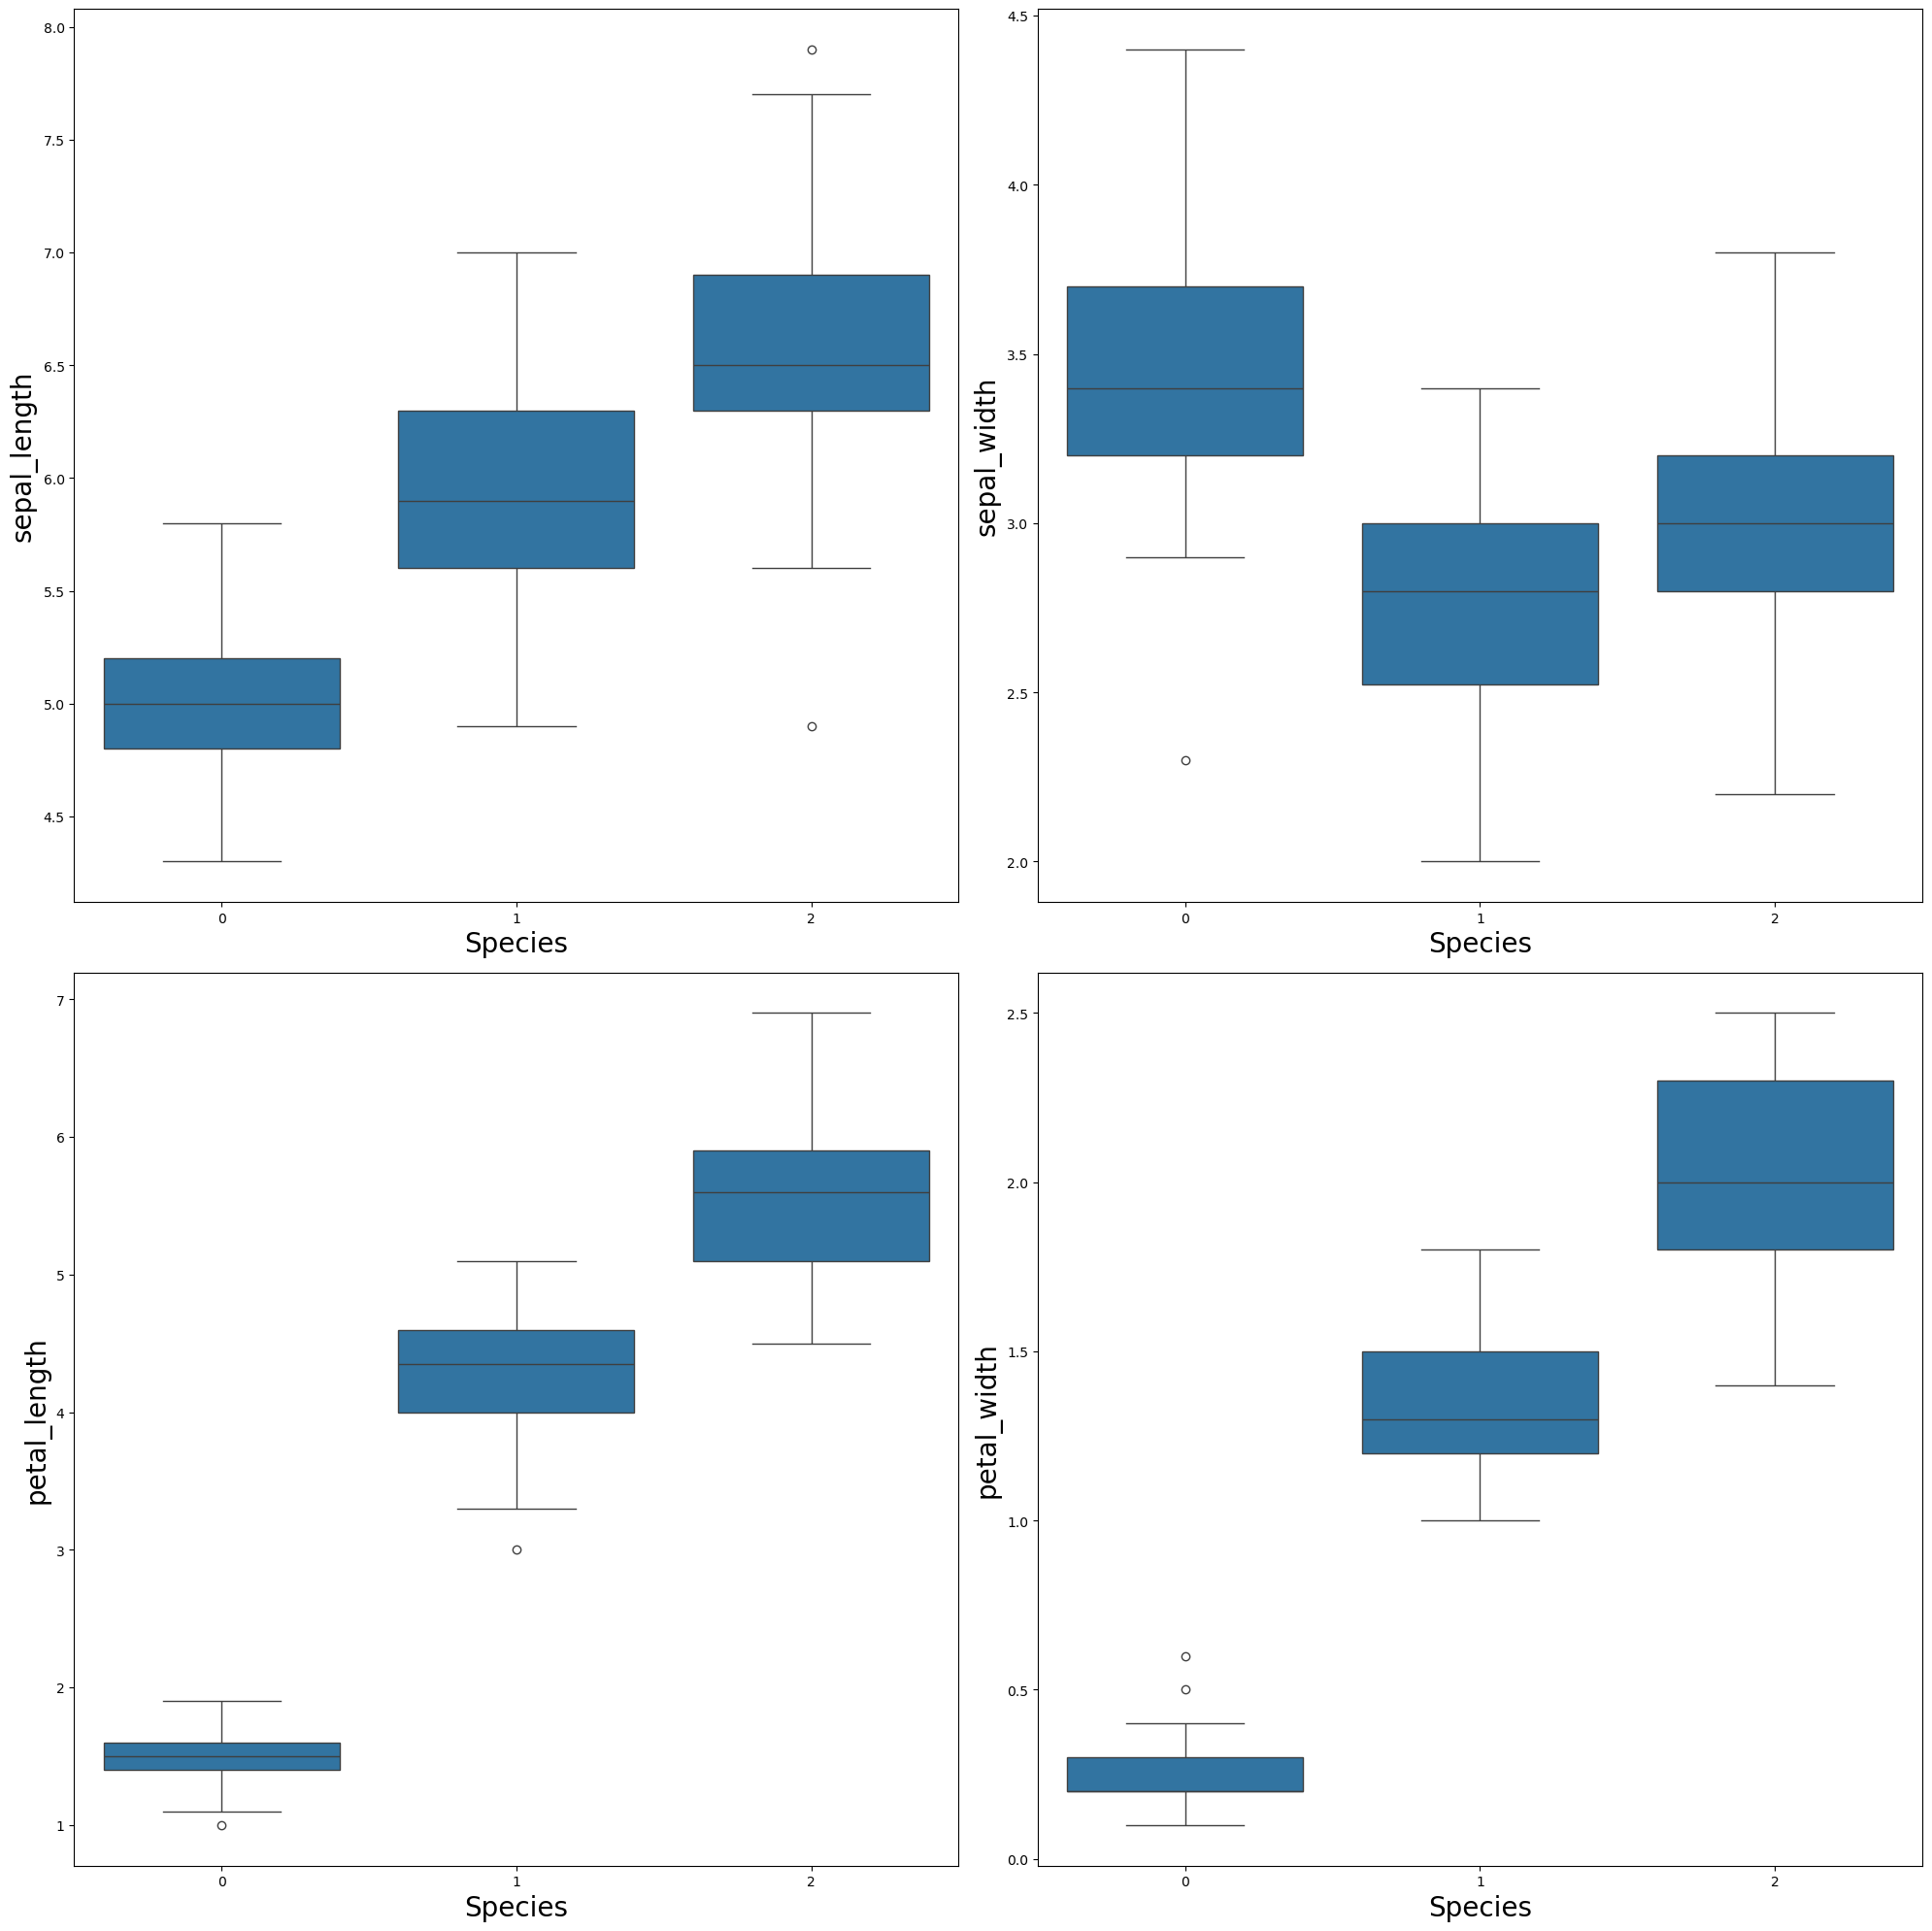

In [18]:

box = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Set up the plot
plt.figure(figsize=(20, 20), facecolor='white')
plotnum = 1

# Iterate through the columns
for c in box:
    if plotnum <= len(box):  
        ax = plt.subplot(2, 2, plotnum)  
        sns.boxplot(x='species', y=c, data=data) 
        plt.xlabel('Species', fontsize=20)
        plt.ylabel(c, fontsize=20) 
        
        plotnum += 1

# Adjust layout
plt.tight_layout()
plt.show()


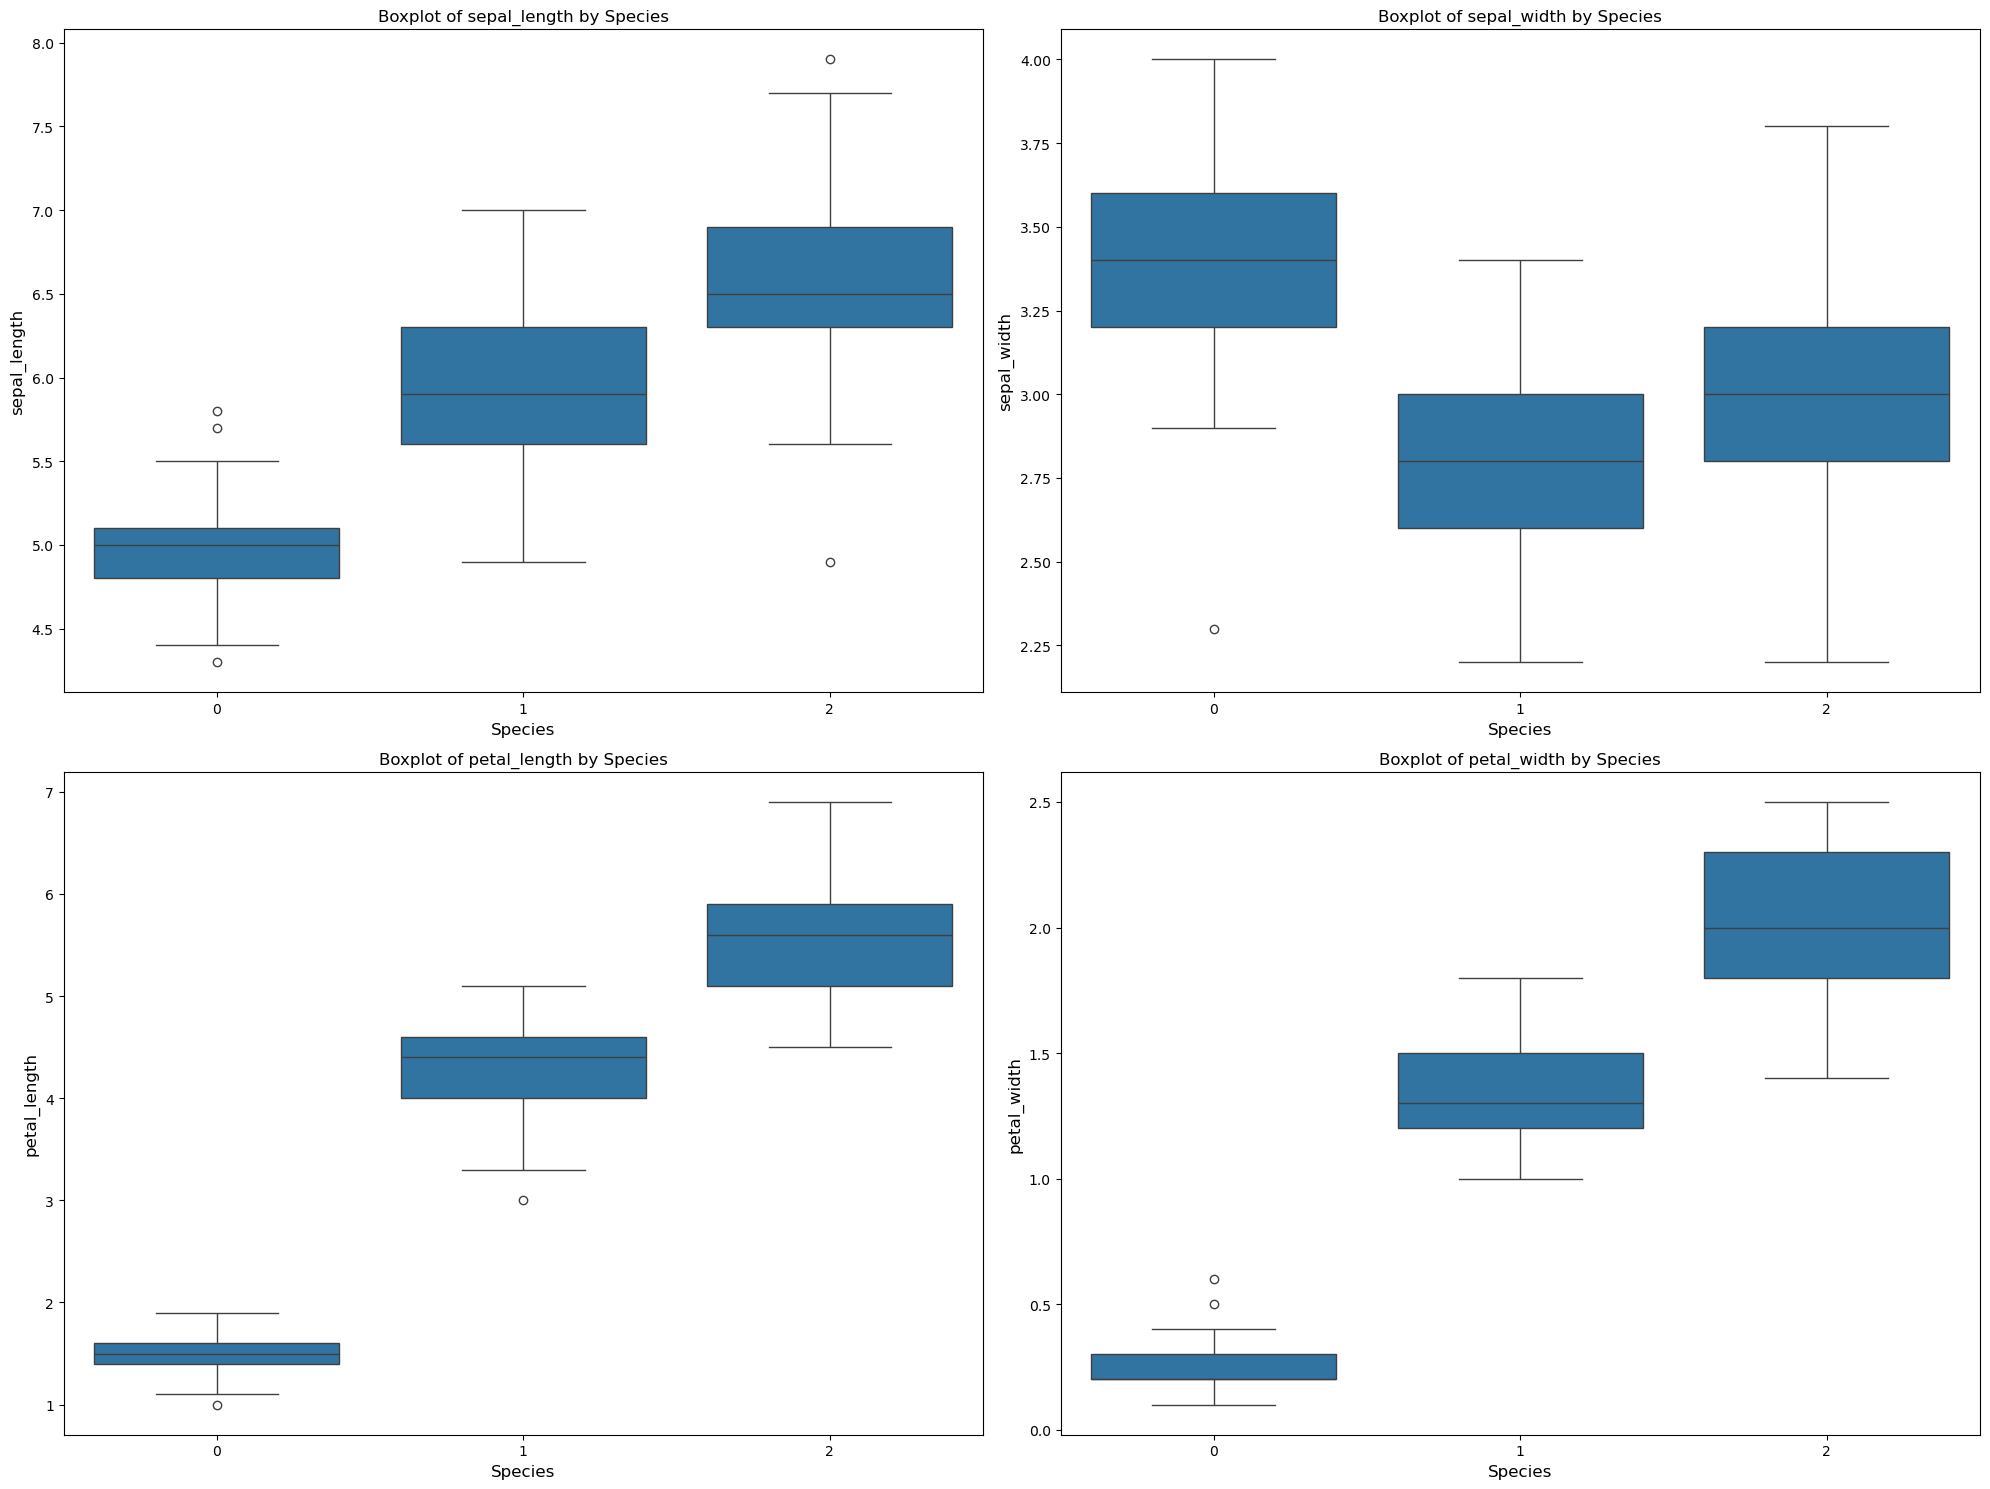

In [19]:

# List of numerical columns
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the dataset
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers
data_cleaned = remove_outliers_iqr(data, numerical_cols)

# Plot boxplots after removing outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=data_cleaned)
    plt.title(f'Boxplot of {column} by Species')
    plt.xlabel('Species', fontsize=12)
    plt.ylabel(column, fontsize=12)
plt.tight_layout()
plt.show()


<Axes: >

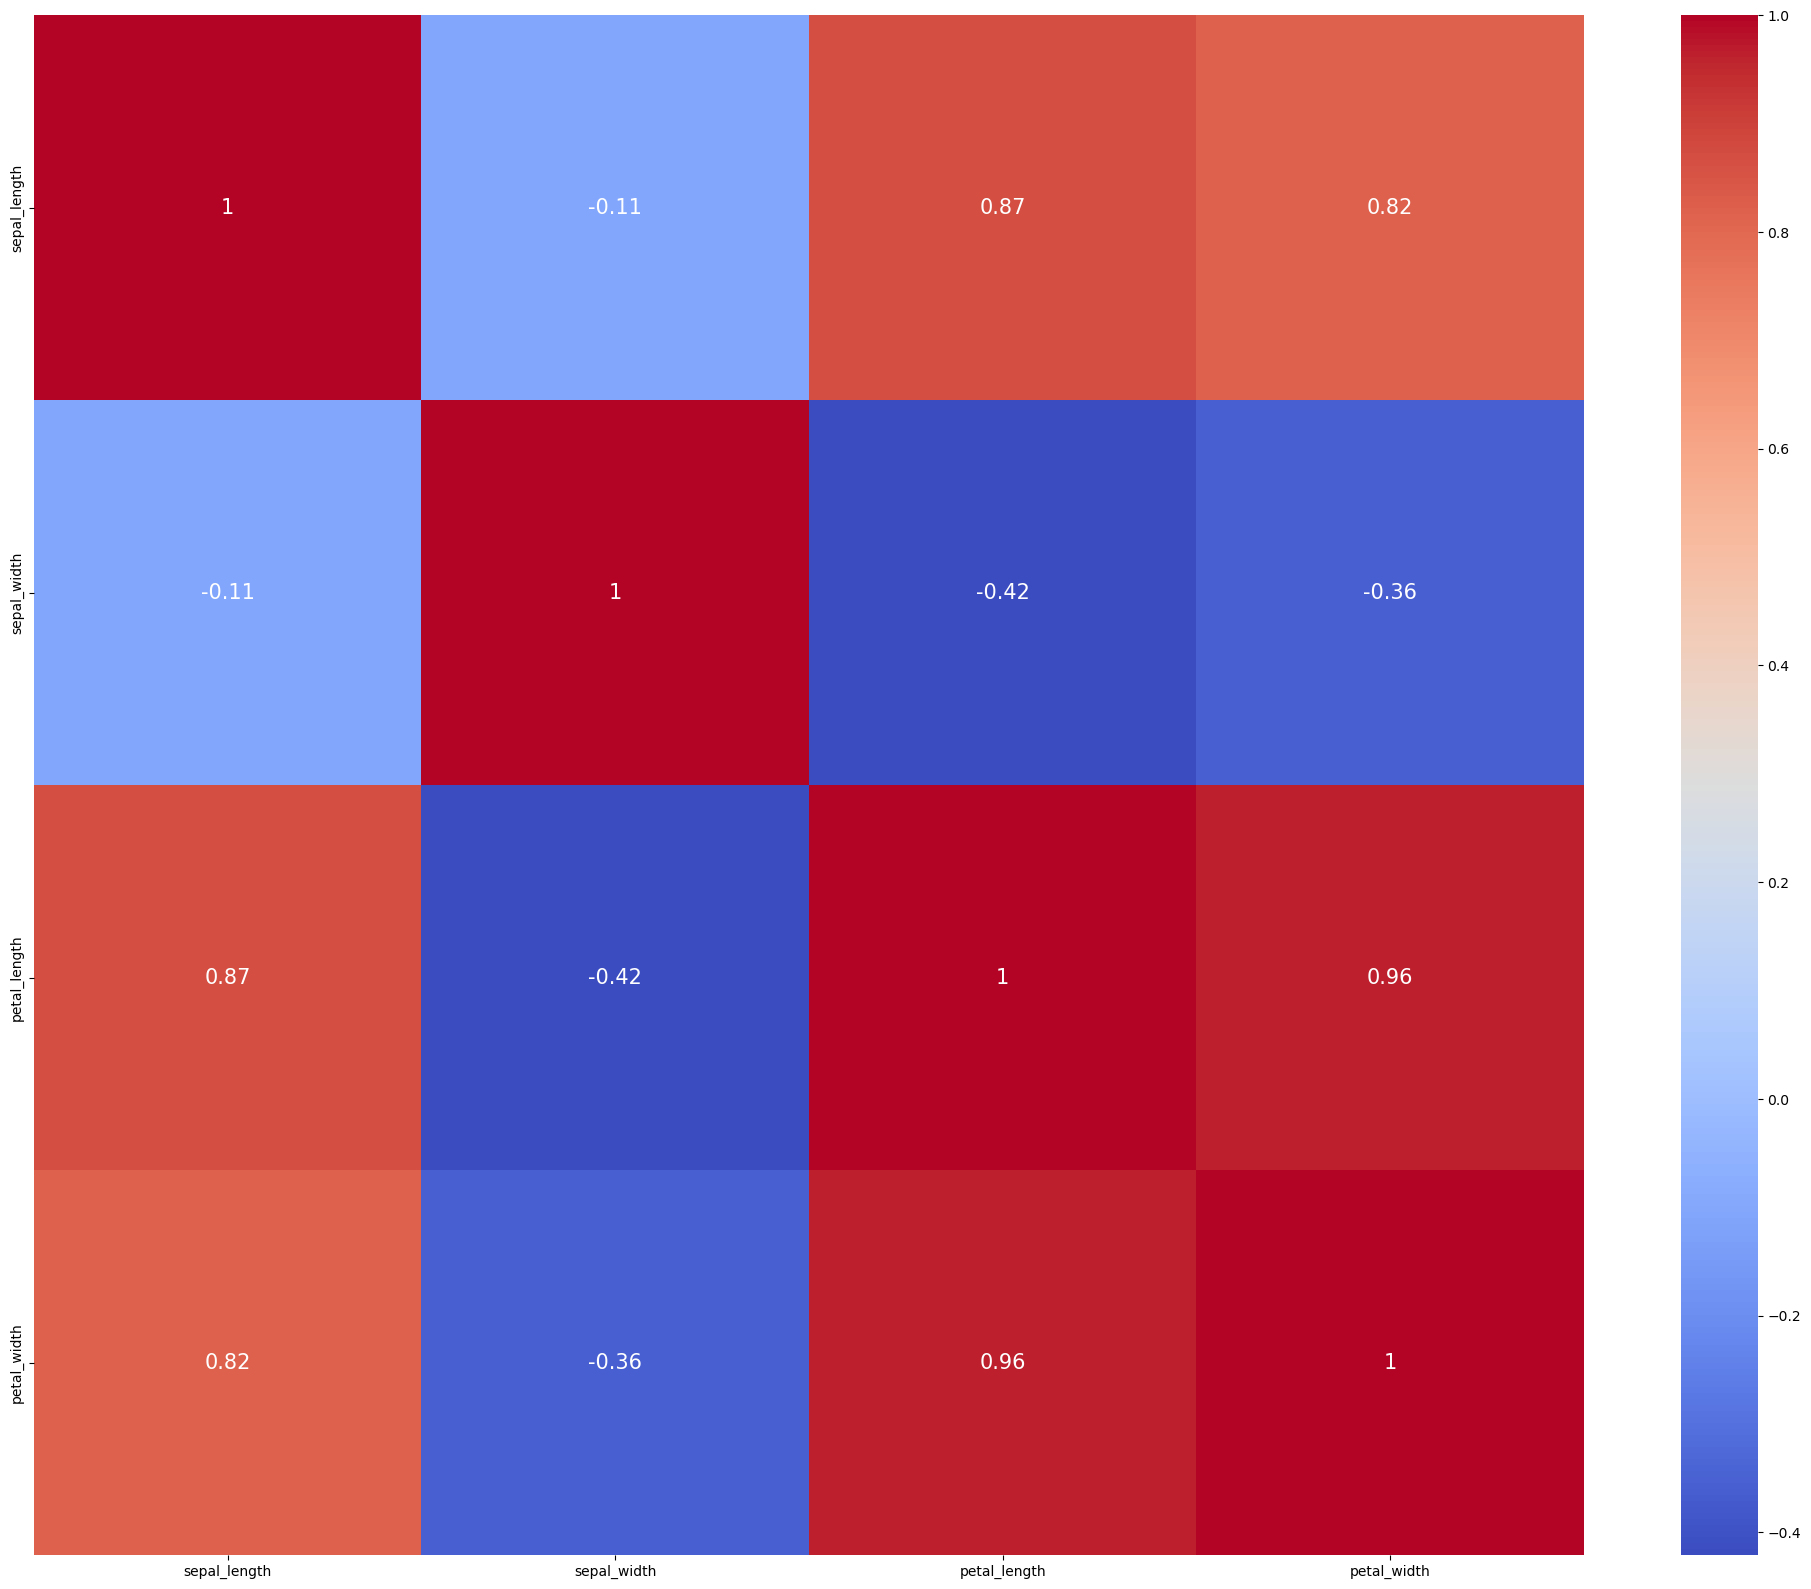

In [20]:
plt.figure(figsize=(25,20))
sns.heatmap(data.drop('species',axis=1).corr(),annot=True,cmap="coolwarm", annot_kws={"size":15})

# step 5 : feature selection

In [21]:
## spliting train and test data
x = data.drop(columns = ['species']) # Independent variables
y = data['species'] # Dependent varaible.

In [22]:
from sklearn.preprocessing import StandardScaler 
scalar=StandardScaler()
x_scaled= scalar.fit_transform(x)


In [24]:
# spliting training and testing test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)

# step 6 : model creation

## 1..Using KNN

In [26]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
error_rate=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [27]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
error_rate

[0.08108108108108109,
 0.05405405405405406,
 0.05405405405405406,
 0.05405405405405406,
 0.05405405405405406,
 0.05405405405405406,
 0.05405405405405406,
 0.05405405405405406,
 0.05405405405405406,
 0.05405405405405406]

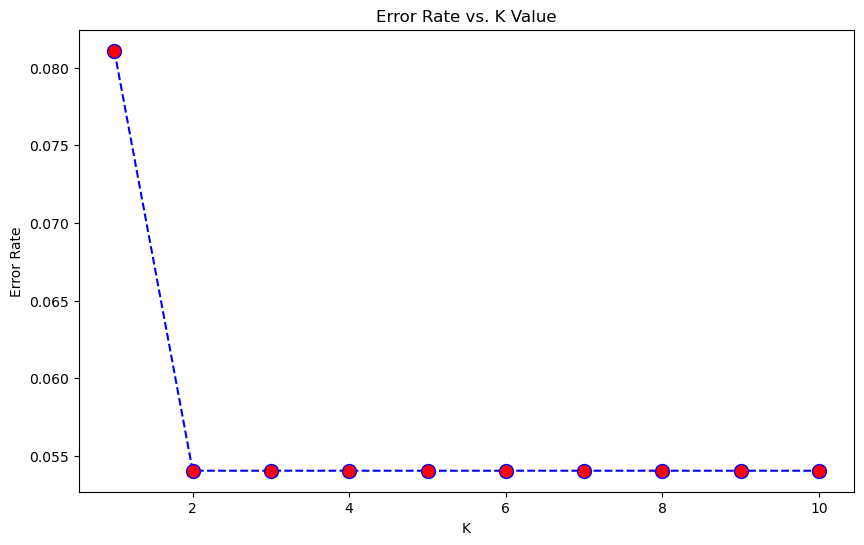

In [29]:
## ploting k value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
y_predict=knn1.predict(x_test)

In [32]:
print("The accuracy score is : ", accuracy_score(y_test,y_predict))

The accuracy score is :  0.9459459459459459


In [33]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
recall=recall_score(y_test,y_predict,average='macro')
print("recall score is :",recall)



recall score is : 0.9410256410256409


In [34]:
precision = precision_score(y_test, y_predict, average='macro')
f1 = f1_score(y_test, y_predict, average='macro')
print("precision score is :",precision)
print("f1 score is:",f1)

precision score is : 0.9410256410256409
f1 score is: 0.9410256410256409


In [35]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]


## 2.using svc

In [37]:
from sklearn.svm import SVC
svclassifier = SVC()

svclassifier.fit(x_train, y_train)


SVC()

In [38]:
y_pred=svclassifier.predict(x_test)

In [39]:
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2])

In [40]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.9459459459459459

In [41]:
recall=recall_score(y_test,y_pred,average='macro')
print("recall score is :",recall)
recision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("precision score is :",precision)
print("f1 score is:",f1)
print("The accuracy score is : ", accuracy_score(y_test,y_pred))


recall score is : 0.9410256410256409
precision score is : 0.9410256410256409
f1 score is: 0.9410256410256409
The accuracy score is :  0.9459459459459459


In [42]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]


# 3.logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train) 

LogisticRegression()

In [45]:
y_prediction=clf.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [47]:
cm=confusion_matrix(y_test,y_prediction)
print(cm)

[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]


In [48]:
recall=recall_score(y_test,y_prediction,average='macro')
print("recall score is :",recall)
recision = precision_score(y_test, y_prediction, average='macro')
f1 = f1_score(y_test, y_prediction, average='macro')
print("precision score is :",precision)
print("f1 score is:",f1)
print("The accuracy score is : ", accuracy_score(y_test,y_prediction))

recall score is : 0.9666666666666667
precision score is : 0.9410256410256409
f1 score is: 0.9701104613385315
The accuracy score is :  0.972972972972973




# 1.KNN Model:

## Accuracy: 94.59% indicates that the model classifies most data points correctly.
## Recall: 94.10% suggests that the model is good at identifying positive instances.
## Precision: 94.10% reflects the ability of the model to avoid false positives.
## F1-Score: 94.10% shows a good balance between precision and recall.
## Summary: The KNN model performs well, with consistent metrics indicating balanced performance across accuracy, precision, recall, and F1-score.

# 2.SVC Model:

## Accuracy: 94.59%, same as KNN, demonstrating high overall correctness.
## Recall: 94.10%, indicating similar sensitivity to positive instances as the KNN model.
## Precision: 94.10%, matching the KNN model's ability to minimize false positives.
## F1-Score: 94.10%, balanced between recall and precision.
## Summary: The SVC model matches the KNN model's performance, showing that both are equally effective in this scenario.

# 3.Logistic Regression:

## Accuracy: 97.30% is the highest among the models, showcasing superior overall performance.
## Recall: 96.67%, slightly better than KNN and SVC, indicating improved sensitivity.
## Precision: 94.10%, same as KNN and SVC, showing consistent avoidance of false positives.
## F1-Score: 97.01%, the highest, reflecting the best balance between recall and precision.
## Summary: Logistic Regression outperforms KNN and SVC in terms of accuracy and F1-score, making it the most effective model for this dataset.

### Overall Conclusion:
## Best Model:
### Logistic Regression stands out with the highest accuracy and F1-score, making it the best choice for this classification problem.



## by using elbow technique

In [5]:
# Since it is an unsupervised learning, we need only the input variables
X= data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans


# Initialise the model with K as 3
model = KMeans(n_clusters=3, random_state=10)

#Training the model
model.fit(X)

KMeans(n_clusters=3, random_state=10)

In [7]:
X.shape

(150, 4)

In [8]:
# centroids of the clusters
model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [10]:
# print dataset with the label
X['Group']= pd.DataFrame(model.labels_)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,Group
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
new_point=[[6.4,5.6,5.4,0.8]] # A new observation where it will go 
#means which cluster
model.predict(new_point)

array([2])

In [13]:
# determine k using elbow method

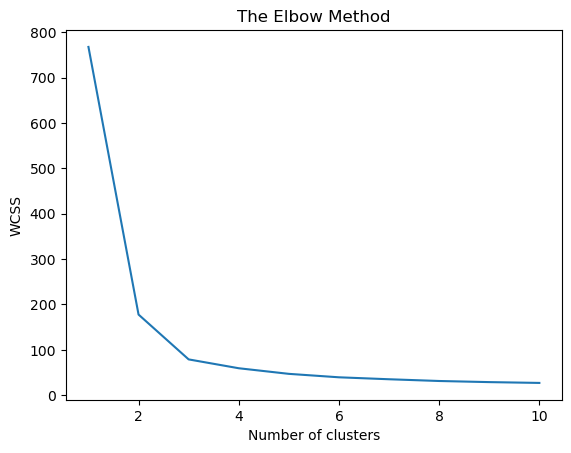

In [14]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

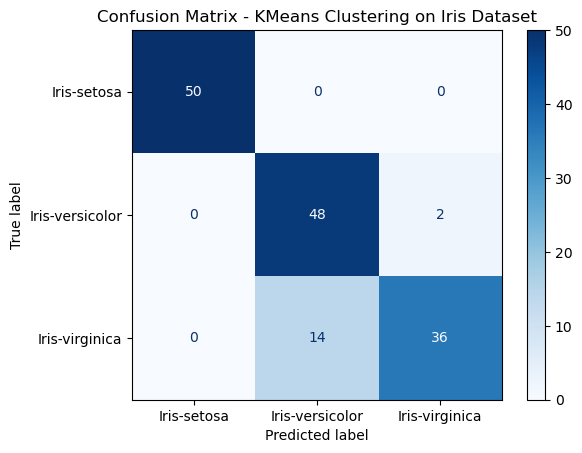

In [20]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_column = 'species'

# Extract features and target
X = data[feature_columns].values  # Convert features to a NumPy array
y = data[target_column].values  # Convert target to a NumPy array

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Map KMeans cluster labels to the true labels
def map_labels(kmeans_labels, y_true):
    mapping = {}
    for cluster in np.unique(kmeans_labels):
        # Find the most common true label in each cluster
        true_labels, counts = np.unique(y_true[kmeans_labels == cluster], return_counts=True)
        mapping[cluster] = true_labels[np.argmax(counts)]
    return np.array([mapping[label] for label in kmeans_labels])

mapped_labels = map_labels(kmeans_labels, y)

# Compute the confusion matrix
cm = confusion_matrix(y, mapped_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix - KMeans Clustering on Iris Dataset")
plt.show()
